# tmp
this is just a dump for testing

In [1]:
import os
import sys

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
sys.path.insert(0, '../../icenumerics/')
sys.path.insert(0, './auxnumerics/')
sys.path.insert(0, './testing/')
import icenumerics as ice


from parameters import params
import auxiliary as aux
import montecarlo_colloids as mc
import vertices as vrt

ureg = ice.ureg

%reload_ext autoreload
%autoreload 2

idx = pd.IndexSlice


In [ ]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    'font.family': 'serif',
    'text.usetex': True,
    'pgf.rcfonts': False,
})

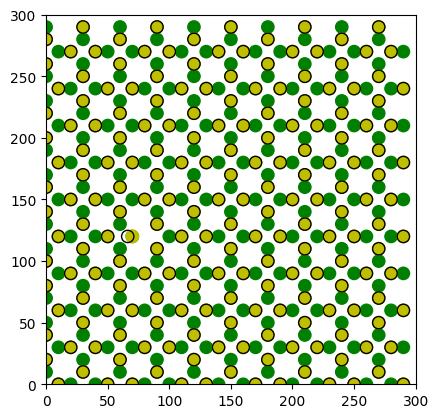

In [11]:
N = 10
a = params['lattice_constant']

sp = ice.spins()
sp.create_lattice('square', [N,N], lattice_constant=a ,border='periodic')

particle = ice.particle(radius=params['particle_radius'],
                        susceptibility=params['particle_susceptibility'],
                        diffusion=params['particle_diffusion'],
                        temperature=params['particle_temperature'],
                        density=params['particle_density']
)

trap = ice.trap(trap_sep=params['trap_sep'],
                height=params['trap_height'],
                stiffness=params['trap_stiffness']
)

trap2 = ice.trap(trap_sep=0*params['trap_sep'],
                height=params['trap_height'],
                stiffness=params['trap_stiffness']
)


GSTRJ = pd.read_csv(f'../data/states/ice/{N}.csv',index_col='id')

# make the structure of the colloid
centers = [row[['x','y','z']].to_list() * ureg.um for _,row in GSTRJ.iterrows()]
directions = [row[['dx','dy','dz']].to_list() * ureg.um for _,row in GSTRJ.iterrows()]
arrangement = {"centers": centers,
              "directions": directions
              }

# select one particle to fix
idx = 42
traps = [trap2 if (i==idx) else trap for i in range(len(centers)) ]

col = ice.colloidal_ice(arrangement, particle, traps,
                       height_spread=0,
                       susceptibility_spread=0.1,
                       periodic=True)

particle_radius = params['particle_radius']
col.region = np.array([[0,0,-3*(particle_radius/a/N).magnitude],[1,1,3*(particle_radius/a/N).magnitude]])*N*a

# move the particle a tiny bit 
col[idx].colloid += col[idx].direction * params['lattice_constant']/8
col[idx].center += col[idx].direction * params['trap_sep']/2

col.display()


In [12]:
col[idx].colloid

Magnitude,[-3.75 -0.0 -0.0]
Units,micrometer


In [3]:
col.to_ctrj()

,x,y,z,dx,dy,dz,cx,cy,cz
id,,,,,,,,,
0,15.0,0.0,0.0,-1.000000e+00,-0.0,-0.0,-5.000000e+00,-0.0,-0.0
1,45.0,0.0,0.0,1.000000e+00,0.0,0.0,5.000000e+00,0.0,0.0
2,75.0,0.0,0.0,-1.000000e+00,-0.0,-0.0,-5.000000e+00,-0.0,-0.0
3,105.0,0.0,0.0,1.000000e+00,0.0,0.0,5.000000e+00,0.0,0.0
4,135.0,0.0,0.0,-1.000000e+00,-0.0,-0.0,-5.000000e+00,-0.0,-0.0
...,...,...,...,...,...,...,...,...,...
195,150.0,285.0,0.0,6.123234e-17,1.0,0.0,3.061617e-16,5.0,0.0
196,180.0,285.0,0.0,-6.123234e-17,-1.0,-0.0,-3.061617e-16,-5.0,-0.0
197,210.0,285.0,0.0,6.123234e-17,1.0,0.0,3.061617e-16,5.0,0.0


In [4]:
col[idx].colloid += col[idx].direction * params['lattice_constant']/4


In [5]:
col[idx].colloid 

Magnitude,[-11.25 -0.0 -0.0]
Units,micrometer


In [ ]:

col = ice.colloidal_ice(sp, particle, trap,
                        height_spread=params['height_spread'],
                        susceptibility_spread=params['susceptibility_spread'],
                        periodic=params['isperiodic']
)

col.randomize()
col.region = np.array([[0,0,-3*(params["particle_radius"]/a/N).magnitude],[1,1,3*(params["particle_radius"]/a/N).magnitude]])*N*a

col.to_ctrj().to_csv('array.csv')

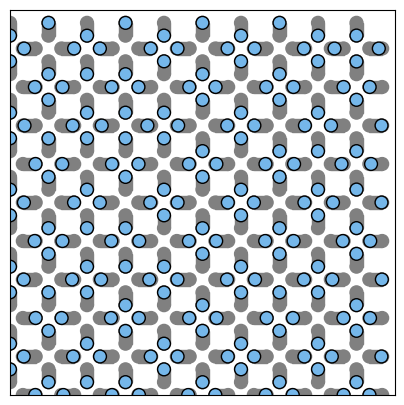

In [51]:
fig, ax = plt.subplots(figsize=(5,5))

ice.draw_frame(trj, frame_no=0,
               region=[0,300,0,300],
               radius=params["particle_radius"].magnitude,
               cutoff=params["trap_sep"].magnitude/2,
               particle_color='#75b7ea',
               trap_color='gray',
               ax = ax)

plt.show()